## MySmartPrice
####       - A comprehensive laptop price analysis

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
import seaborn as sns

Scraping the data from the single page application website 'MySmartPrice' and retrieving the required info.

In [86]:
price_raw=[]
disp_len=[]
prod_title=[]
rating=[]
more_price=[]
for i in range(1,112):
    URL='https://www.mysmartprice.com/msp/processes/property/api/msp_get_html_for_property_new.php?subcategory=laptops&page_type=all-list&filter_type=&list_url=https://m.mysmartprice.com/computer/pricelist/laptops-price-list-in-india.html&category=computer&property=1201887-69721986|1201887-69721987&page={}'.format(i)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}
    data=requests.get(URL,headers=headers)
    data1=data.text
    raw=BeautifulSoup(data1)
    list1=raw.find_all('div',attrs={'class':'prdct-item__dtls amd-cls-icon'})
    for j in list1:
        price=j.find('div',attrs={'class':'prdct-item__prc main-wrpr__cols1 js-open-link prdct-item__prc-val'})
        if (price is None):   # Appending None if unable to find any data
            price_raw.append(np.nan)
        else:
            price_raw.append(price.text.replace('₹','').replace(',','').strip())
        display=j.find('li',attrs={'class':'prdct-item__spcftn'})
        if(display is None):
            disp_len.append(np.nan)
        else:
            disp_len.append(display.text)
        title=j.find('a',attrs={'class':'prdct-item__name ga_event_cls'})
        if(title is None):
            prod_title.append(np.nan)
        else:
            prod_title.append(title.text)
        addn=j.find('div',attrs={'class':'prdct-item__prc-drpdwn sctn cols1-prdcts clearfix'})
        if(addn is None):
            more_price.append('NA/OOS')
        else:
            more_price.append(addn.text)
        reviews=j.find("div",class_="rtng-star js-tltp")
        if(reviews is None):
            rating.append(np.NaN)
        else:
            rating.append(reviews)

Using RegEx to retrieve the numeric price value from the scraped data which is readily available on the website

In [137]:
price_list=[]
for i in price_raw:
    price_list.append(int(re.search('[0-9]+',i).group()))
price_list

[109990,
 99900,
 73490,
 49990,
 59899,
 54990,
 32999,
 74590,
 85800,
 22990,
 35339,
 54990,
 52990,
 29774,
 99900,
 31529,
 36163,
 31041,
 31490,
 125990,
 63400,
 26990,
 28543,
 45990,
 40990,
 23990,
 25990,
 29990,
 31190,
 27290,
 36490,
 35999,
 35990,
 29000,
 43500,
 24999,
 30000,
 33996,
 27990,
 38999,
 27825,
 48300,
 27225,
 45100,
 72990,
 33790,
 64990,
 42800,
 35750,
 28990,
 24192,
 35990,
 51490,
 36370,
 43990,
 24990,
 61990,
 69490,
 58990,
 29990,
 26990,
 35650,
 22490,
 52790,
 30590,
 56999,
 44600,
 52000,
 37990,
 17990,
 33990,
 30490,
 22490,
 30980,
 18691,
 56550,
 20990,
 13869,
 35990,
 25490,
 35490,
 46990,
 38000,
 24990,
 33285,
 57990,
 65990,
 24522,
 25012,
 29990,
 57999,
 29990,
 69750,
 54990,
 38990,
 34459,
 119990,
 39990,
 28990,
 26990,
 25225,
 28409,
 46990,
 80900,
 32640,
 46490,
 39487,
 36500,
 38990,
 46990,
 22185,
 44390,
 58490,
 44999,
 41990,
 24490,
 42990,
 33490,
 37098,
 30990,
 21990,
 20990,
 42999,
 35890,
 2939

Retrieving rating from the data

In [138]:
temp=[]
for i in rating:
    if(i is np.nan):
        temp.append(np.nan)
    else:
        
        p=str(i).replace('<div','').replace('</div>','')
        x=re.compile('Rated\s[0-9]([.][0-9])?').search(p).group()
        temp.append(x)

In [139]:
ratings=[]
for i in temp:
    if(i is np.nan):
        ratings.append(np.nan)
    else:
        ratings.append(re.compile('[0-9]([.][0-9])?').search(i).group())

In [140]:
re.compile('[0-9]([.][0-9])?').search(temp[485]).group()

'4.3'

In [141]:
a=more_price
b=[]
for i in a:
    q=i.replace('\n','').replace('₹','')
    b.append(q)
more_price=b


In [142]:
more_price

['Flipkart109,990 ❯',
 'Croma99,900 ❯',
 'Amazon73,490 ❯',
 'Flipkart49,990 ❯',
 'Croma59,899 ❯',
 'Flipkart54,990 ❯Amazon63,000 ❯',
 'Flipkart32,999 ❯',
 'NA/OOS',
 'NA/OOS',
 'Amazon22,990 ❯',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'Flipkart31,529 ❯',
 'Flipkart36,163 ❯',
 'Flipkart31,041 ❯',
 'NA/OOS',
 'NA/OOS',
 'Amazon63,400 ❯',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'Flipkart40,990 ❯',
 'NA/OOS',
 'NA/OOS',
 'Flipkart29,990 ❯',
 'NA/OOS',
 'NA/OOS',
 'Flipkart36,490 ❯Croma38,306 ❯Amazon41,837 ❯',
 'Flipkart35,999 ❯',
 'Flipkart35,990 ❯',
 'Amazon29,000 ❯',
 'NA/OOS',
 'NA/OOS',
 'Flipkart30,000 ❯',
 'NA/OOS',
 'Flipkart39,990 ❯',
 'NA/OOS',
 'NA/OOS',
 'Amazon48,300 ❯',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'Amazon42,800 ❯',
 'Flipkart35,750 ❯',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'Flipkart51,490 ❯',
 'Flipkart36,370 ❯',
 'NA/OOS',
 'NA/OOS',
 'NA/OOS',
 'Flipkart69,490 ❯',
 'Flipkart58,990 ❯',
 'NA/OOS',
 'Flipkart26,990 ❯',
 'Amazon35,650 ❯',
 'NA/O

Using Regex to find the prices across each website for the laptops and append it against it

In [143]:
Croma_price=[]
Flipkart_price=[]
Amazon_price=[]
for i in more_price:
    if('Croma' in i):
        x=re.search('Croma[0-9]+[,][0-9]+',i).group().replace('Croma','').replace(',','')
        Croma_price.append(x)
    else:
        Croma_price.append('NA/OOS')
    if('Flipkart' in i):
        x=re.search('Flipkart[0-9]+[,][0-9]+',i).group().replace('Flipkart','').replace(',','')
        Flipkart_price.append(x)
    else:
        Flipkart_price.append('NA/OOS')
    if('Amazon' in i):
        x=re.search('Amazon[0-9]+[,][0-9]+',i).group().replace('Amazon','').replace(',','')
        Amazon_price.append(x)
    else:
        Amazon_price.append('NA/OOS')

In [144]:
laptops=pd.DataFrame({'Product_title':prod_title})

In [145]:
laptops.Product_title[0]

'Apple MacBook Air M1 MGNA3HN/A Ultrabook (13.3 Inch | Apple M1 | 8 GB | macOS Big Sur | 512 GB SSD)'

In [146]:
re.compile('[A-Za-z]+').search(laptops.Product_title[0]).group()

'Apple'

In [147]:
laptops['Brand']=laptops.Product_title.apply(lambda x: re.compile('[A-Za-z]+').search(x).group())

In [148]:
laptops.Product_title[6]

'Realme Book Slim Laptop (14 Inch | Core i3 11th Gen | 8 GB | Windows 10 | 256 GB SSD)'

In [149]:
laptops['Processor']=laptops.Product_title.apply(lambda x: x.split('|')[1])

In [150]:
laptops.Processor[0]

' Apple M1 '

In [151]:
laptops['RAM(GB)']=laptops.Product_title.apply(lambda x: x.split('|')[2].replace(' GB','').strip())

In [152]:
laptops['RAM(GB)'][0].strip()

'8'

In [153]:
laptops.head()

,Product_title,Brand,Processor,RAM(GB)
0,Apple MacBook Air M1 MGNA3HN/A Ultrabook (13.3...,Apple,Apple M1,8
1,Apple MacBook Air M1 MGN93HN/A Ultrabook (13.3...,Apple,Apple M1,8
2,Apple MacBook Air MQD32HN/A Ultrabook (13.3 In...,Apple,Core i5 5th Gen,8
3,Acer Aspire 7 A715-75G-50TA (NH.Q97SI.001) Lap...,Acer,Core i5 10th Gen,8
4,ASUS TUF Gaming F15 FX506LHB-HN355WS Laptop (1...,ASUS,Core i5 10th Gen,8


In [154]:
laptops['OS']=laptops.Product_title.apply(lambda x: x.split('|')[3])

In [155]:
laptops.OS[0]

' macOS Big Sur '

In [156]:
laptops['Storage']=laptops.Product_title.apply(lambda x: x.split('|')[4].replace(')',''))
laptops.Storage

0                 512 GB SSD
1                 256 GB SSD
2                 128 GB SSD
3                 512 GB SSD
4                 512 GB SSD
                ...         
5323              500 GB HDD
5324     1 TB HDD 256 GB SSD
5325                1 TB HDD
5326              512 GB SSD
5327                1 TB HDD
Name: Storage, Length: 5328, dtype: object

Identifying the processor brand with the available common traits of the products

In [157]:
p_brand=[]
for i in laptops.Product_title:
    if('M1' in i) or ('M2' in i):
        p_brand.append('Apple')
    elif('i3'in i) or('i5' in i)or('i6'in i)or('i7'in i)or('i9'in i)or('i11'in i)or('pentium'in i)or('celeron'in i):
        p_brand.append('Intel')
    elif('AMD' or 'Ryzen' in i):
        p_brand.append('AMD')
    else:
        p_brand.append(np.nan)

laptops['Processor_Brand']=p_brand

In [158]:
laptops['Price']=price_list
laptops['Screen_size']=disp_len
laptops['FLipkart_price']=Flipkart_price
laptops['Amazon_price']=Amazon_price
laptops['Croma_price']=Croma_price

In [159]:
laptops['Ratings']=ratings

In [160]:
laptops.columns

Index(['Product_title', 'Brand', 'Processor', 'RAM(GB)', 'OS', 'Storage',
       'Processor_Brand', 'Price', 'Screen_size', 'FLipkart_price',
       'Amazon_price', 'Croma_price', 'Ratings'],
      dtype='object')

In [161]:
laptops=laptops[['Product_title', 'Brand', 'Processor', 'Processor_Brand','RAM(GB)', 'OS', 'Storage','Screen_size', 'Price', 
                 'FLipkart_price','Amazon_price', 'Croma_price', 'Ratings']]

In [162]:
laptops.head()

,Product_title,Brand,Processor,Processor_Brand,RAM(GB),OS,Storage,Screen_size,Price,FLipkart_price,Amazon_price,Croma_price,Ratings
0,Apple MacBook Air M1 MGNA3HN/A Ultrabook (13.3...,Apple,Apple M1,Apple,8,macOS Big Sur,512 GB SSD,13.3 inch Screen,109990,109990,NA/OOS,NA/OOS,4.7
1,Apple MacBook Air M1 MGN93HN/A Ultrabook (13.3...,Apple,Apple M1,Apple,8,macOS Big Sur,256 GB SSD,13.3 inch Screen,99900,NA/OOS,NA/OOS,99900,4.7
2,Apple MacBook Air MQD32HN/A Ultrabook (13.3 In...,Apple,Core i5 5th Gen,Intel,8,macOS Sierra,128 GB SSD,13.3 inch Screen,73490,NA/OOS,73490,NA/OOS,4.6
3,Acer Aspire 7 A715-75G-50TA (NH.Q97SI.001) Lap...,Acer,Core i5 10th Gen,Intel,8,Windows 10,512 GB SSD,15.6 inch Screen,49990,49990,NA/OOS,NA/OOS,4.4
4,ASUS TUF Gaming F15 FX506LHB-HN355WS Laptop (1...,ASUS,Core i5 10th Gen,Intel,8,Windows 11,512 GB SSD,15.6 inch Screen,59899,NA/OOS,NA/OOS,59899,4.4


In [163]:
laptops[laptops.duplicated(subset=['Product_title'],keep='first')]

,Product_title,Brand,Processor,Processor_Brand,RAM(GB),OS,Storage,Screen_size,Price,FLipkart_price,Amazon_price,Croma_price,Ratings
33,Infinix INBook X1 XL11 Laptop (14 Inch | Core ...,Infinix,Core i3 10th Gen,Intel,8,Windows 11,256 GB SSD,14 inch Screen,29000,NA/OOS,29000,NA/OOS,4.3
302,Infinix INBook X1 XL11 Laptop (14 Inch | Core ...,Infinix,Core i5 10th Gen,Intel,8,Windows 11,512 GB SSD,14 inch Screen,37990,NA/OOS,42990,NA/OOS,4.1
1803,Infinix INBook X1 Slim XL21 Laptop (14 Inch | ...,Infinix,Core i3 10th Gen,Intel,8,Windows 11,512 GB SSD,14 inch Screen,32990,NA/OOS,NA/OOS,NA/OOS,NaN
3055,ASUS Zenbook 14 UM431DA-AM581TS Laptop (14 Inc...,ASUS,AMD Quad Core Ryzen 5,AMD,8,Windows 10,512 GB SSD,14 inch Screen,60999,NA/OOS,NA/OOS,NA/OOS,4.3


In [164]:
laptops.shape

(5328, 13)

In [165]:
laptops.drop(labels=laptops[laptops.duplicated(subset=['Product_title'],keep='first')].index.values,inplace=True)

In [166]:
laptops.shape

(5324, 13)

In [167]:
temp=laptops.Screen_size.copy()
laptops['Screen_size']=(temp.apply(lambda x: x.replace(' inch','').replace(' Screen',''))).values

In [168]:
laptops.rename(columns={'Screen_size':'Screen_size(inch)'},inplace=True)

In [174]:
temp1=laptops.Storage.apply(lambda x: re.compile('[0-9]+\s[A-Z]+\sSSD').search(x))
temp2=[]
for i in temp1:
    if(i is None):
        temp2.append('NA')
    else:
        temp2.append(int(i.group().replace('GB','').replace('SSD','').replace('1 TB','1024').replace('2 TB','2048').replace('3 TB','3072').strip()))
laptops.insert(7,'Storage(SSD_GB)',temp2)

In [175]:
temp1=[]
temp=laptops.Storage.apply(lambda x: re.compile('[0-9]+\s[A-Z]+\sHDD').search(x))
for i in temp:
    if(i is None):
        temp1.append('NA')
    else:
        temp1.append(int(i.group().replace('GB','').replace('HDD','').replace('1 TB','1024').replace('2 TB','2048').replace('3 TB','3072').strip()))
laptops.insert(7,'Storage(HDD_GB)',temp1)

In [176]:
laptops.head()

,Product_title,Brand,Processor,Processor_Brand,RAM(GB),OS,Storage,Storage(HDD_GB),Storage(SSD_GB),Screen_size(inch),Price,FLipkart_price,Amazon_price,Croma_price,Ratings
0,Apple MacBook Air M1 MGNA3HN/A Ultrabook (13.3...,Apple,Apple M1,Apple,8,macOS Big Sur,512 GB SSD,NA,512,13.3,109990,109990,NA/OOS,NA/OOS,4.7
1,Apple MacBook Air M1 MGN93HN/A Ultrabook (13.3...,Apple,Apple M1,Apple,8,macOS Big Sur,256 GB SSD,NA,256,13.3,99900,NA/OOS,NA/OOS,99900,4.7
2,Apple MacBook Air MQD32HN/A Ultrabook (13.3 In...,Apple,Core i5 5th Gen,Intel,8,macOS Sierra,128 GB SSD,NA,128,13.3,73490,NA/OOS,73490,NA/OOS,4.6
3,Acer Aspire 7 A715-75G-50TA (NH.Q97SI.001) Lap...,Acer,Core i5 10th Gen,Intel,8,Windows 10,512 GB SSD,NA,512,15.6,49990,49990,NA/OOS,NA/OOS,4.4
4,ASUS TUF Gaming F15 FX506LHB-HN355WS Laptop (1...,ASUS,Core i5 10th Gen,Intel,8,Windows 11,512 GB SSD,NA,512,15.6,59899,NA/OOS,NA/OOS,59899,4.4


In [177]:
laptops=laptops.drop('Storage',axis=1)

In [178]:
print(laptops.shape)
print(laptops.columns)

(5324, 14)
Index(['Product_title', 'Brand', 'Processor', 'Processor_Brand', 'RAM(GB)',
       'OS', 'Storage(HDD_GB)', 'Storage(SSD_GB)', 'Screen_size(inch)',
       'Price', 'FLipkart_price', 'Amazon_price', 'Croma_price', 'Ratings'],
      dtype='object')


In [179]:
laptops.to_csv(r'MySmartPrice.csv')

In [2]:
laptops=pd.read_csv(r'MySmartPrice.csv')
laptops=laptops.drop(['Unnamed: 0'],axis=1)
laptops.head()

,Product_title,Brand,Processor,Processor_Brand,RAM(GB),OS,Storage,Screen_size(inch),Price,FLipkart_price,Amazon_price,Croma_price,Ratings
0,Apple MacBook Air M1 MGNA3HN/A Ultrabook (13.3...,Apple,Apple M1,Apple,8,macOS Big Sur,512 GB SSD,13.3,109990,109990,NA/OOS,NA/OOS,4.7
1,Apple MacBook Air M1 MGN93HN/A Ultrabook (13.3...,Apple,Apple M1,Apple,8,macOS Big Sur,256 GB SSD,13.3,99900,NA/OOS,NA/OOS,99900,4.7
2,Apple MacBook Air MQD32HN/A Ultrabook (13.3 In...,Apple,Core i5 5th Gen,Intel,8,macOS Sierra,128 GB SSD,13.3,73490,NA/OOS,73490,NA/OOS,4.6
3,Acer Aspire 7 A715-75G-50TA (NH.Q97SI.001) Lap...,Acer,Core i5 10th Gen,Intel,8,Windows 10,512 GB SSD,15.6,49990,49990,NA/OOS,NA/OOS,4.4
4,ASUS TUF Gaming F15 FX506LHB-HN355WS Laptop (1...,ASUS,Core i5 10th Gen,Intel,8,Windows 11,512 GB SSD,15.6,59899,NA/OOS,NA/OOS,59899,4.4


In [180]:
laptops.isnull().sum().sort_values(ascending=False)

Ratings              1692
Product_title           0
Brand                   0
Processor               0
Processor_Brand         0
RAM(GB)                 0
OS                      0
Storage(HDD_GB)         0
Storage(SSD_GB)         0
Screen_size(inch)       0
Price                   0
FLipkart_price          0
Amazon_price            0
Croma_price             0
dtype: int64

In [5]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_title      5322 non-null   object 
 1   Brand              5322 non-null   object 
 2   Processor          5322 non-null   object 
 3   Processor_Brand    5322 non-null   object 
 4   RAM(GB)            5322 non-null   int64  
 5   OS                 5322 non-null   object 
 6   Storage(HDD_GB)    2293 non-null   float64
 7   Storage(SSD_GB)    3698 non-null   float64
 8   Screen_size(inch)  5322 non-null   float64
 9   Price              5322 non-null   int64  
 10  FLipkart_price     5322 non-null   object 
 11  Amazon_price       5322 non-null   object 
 12  Croma_price        5322 non-null   object 
 13  Ratings            3649 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 582.2+ KB


In [3]:
laptops.describe().round(2)

,RAM(GB),Storage(HDD_GB),Storage(SSD_GB),Screen_size(inch),Price,Ratings
count,5322.00,2293.00,3698.00,5322.00,5322.00,3649.00
mean,9.30,997.97,494.04,14.93,74613.48,4.07
std,5.79,225.84,315.88,1.13,53458.60,0.50
min,2.00,320.00,8.00,10.10,8990.00,1.00
25%,4.00,1024.00,256.00,14.00,39990.00,3.90
50%,8.00,1024.00,512.00,15.60,59999.00,4.10
75%,12.00,1024.00,512.00,15.60,89753.75,4.40
max,64.00,2048.00,3072.00,18.40,499990.00,5.00


In [4]:
laptops.describe(include=object)

,Product_title,Brand,Processor,Processor_Brand,OS,FLipkart_price,Amazon_price,Croma_price
count,5322,5322,5322,5322,5322,5322,5322,5322
unique,5322,29,112,3,17,388,912,121
top,Apple MacBook Air M1 MGN93HN/A Ultrabook (13.3...,ASUS,Core i5 11th Gen,Intel,Windows 10,NA/OOS,NA/OOS,NA/OOS
freq,1,1377,457,3749,3708,4708,4003,5172


# EDA Analysis:

###  UNIVARIATE & BIVARIATE ANALYSIS:

#### Market Share of each brand:

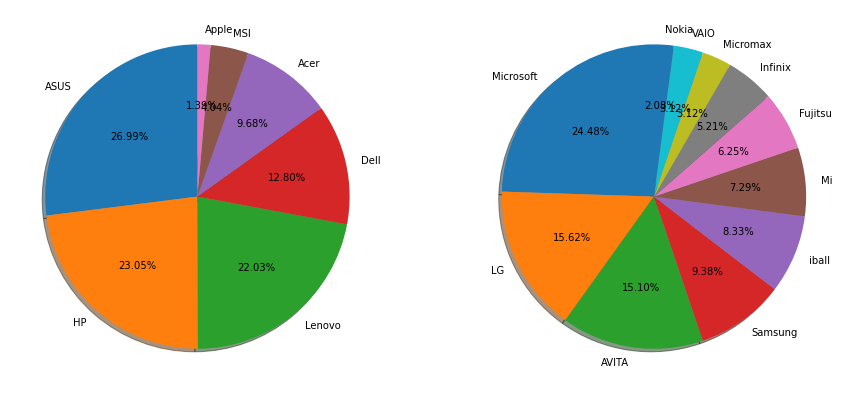

In [67]:
pie1= dict(laptops.Brand.value_counts())
brand_list=list(pie1.keys())
count_list=list(pie1.values())
plt.figure(figsize=(15,15))
plt.title('Laptop Brands with highest Variants')
plt.subplot(1,2,1)
plt.pie(count_list[:7],labels=brand_list[:7],autopct='%1.2f%%',shadow=True,startangle=90)
plt.subplot(1,2,2)
plt.pie(count_list[7:18],labels=brand_list[7:18],autopct='%1.2f%%',shadow=True,startangle=90)
plt.show()

#### From the above Pie-Chart we can infer that, ASUS is dominating the market with more variants followed by HP and Lenovo with small a difference. Dell and Acer followed the latter with marginally less percentage followed by MSI.
#### From this we can reckon that ASUS is supplying more number of variants in Indian Market and could be successful in maintaining the sales.
##### The second plot is share of the laptops next to the top 7 brands with their corresponding market shares.

In [23]:
hist_num=laptops.select_dtypes(['int64','float64'])

In [43]:
hist_cat=laptops.select_dtypes(['object'])
hist_cat=hist_cat.drop(['Product_title','FLipkart_price','Amazon_price','Croma_price','Processor'],axis=1)

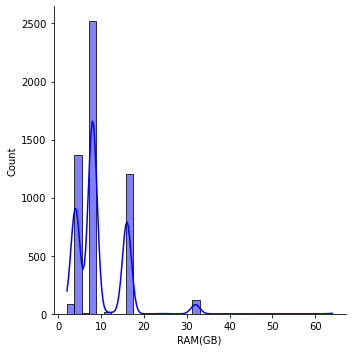

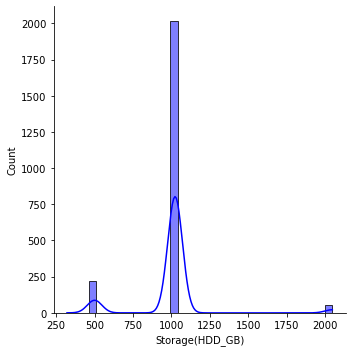

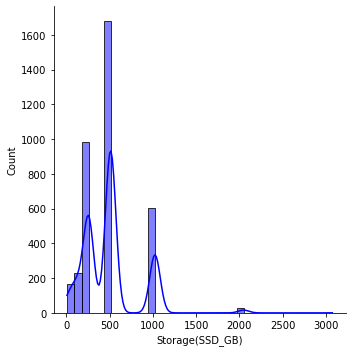

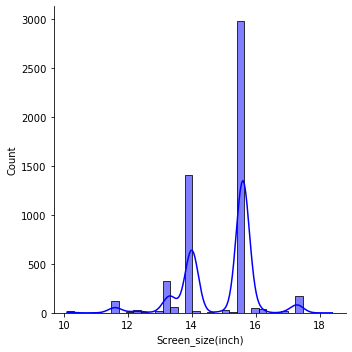

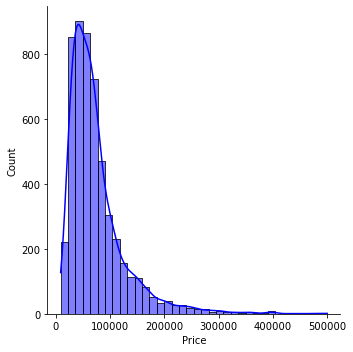

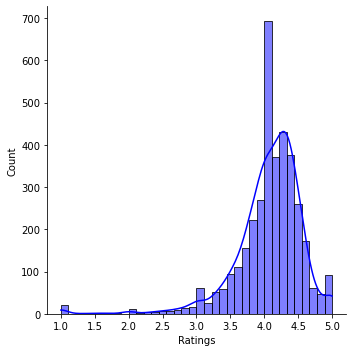

In [27]:
for i in hist_num:
    sns.displot(data=hist_num, x=i, kde=True,bins=int(180/5), color = 'blue')
    plt.show()

 ##### The above plot is the histogram of  numerical data in the laptops dataframe that shows the distribution of the laptops for each column of the dataframe and the unique values respective to that column

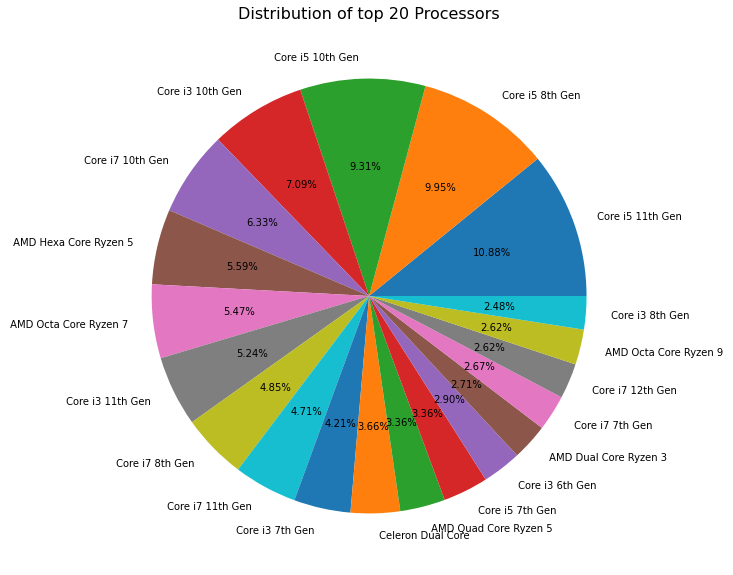

In [47]:
pcr=dict(laptops.Processor.value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,10))
pcr_x,pcr_y=list(pcr.keys()),list(pcr.values())
plt.pie(pcr_y[:20],labels=pcr_x[:20],autopct='%1.2f%%',startangle=0)
plt.title('Distribution of top 20 Processors',fontsize=16)
plt.show()

##### From the above plot we can infer that the maximum laptops are equipped with intel i5 11th gen processor followed by i5 8th gen and 10th gen processors. As observed in the afore plots, we can clearly see the domination of the processor markets by intel. 

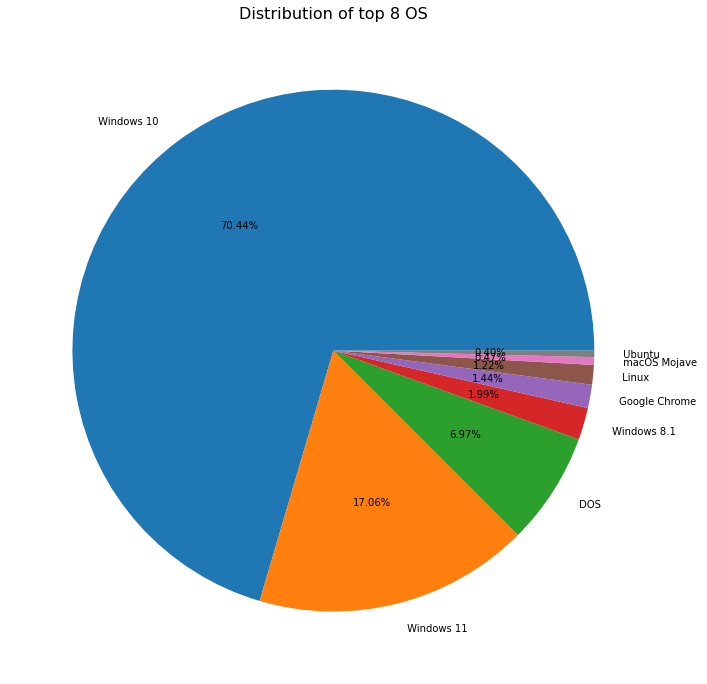

In [69]:
pcr=dict(laptops.OS.value_counts().sort_values(ascending=False))
plt.figure(figsize=(12,12))
pcr_x,pcr_y=list(pcr.keys()),list(pcr.values())
plt.pie(pcr_y[:8],labels=pcr_x[:8],autopct='%1.2f%%',startangle=0)
plt.title('Distribution of top 8 OS',fontsize=16)
plt.show()

##### The above plot gives us an idea of the distribution of the Operating Systems of laptops. We can clearly see that majority of laptops are using window 10 despite the availability of the upragraded version. We can pressume that windows 10 is more compatible to the users than the latter. The third being DOS which also has a considerable share.

Text(0, 0.5, 'Operating System')

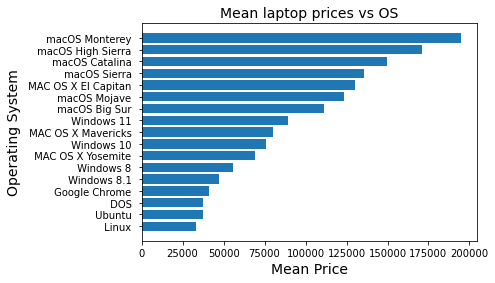

In [113]:
#plt.figure(figsize=(8,8))
OS=dict(laptops.groupby('OS').Price.mean().round(2).sort_values())
x_os,y_os=list(OS.keys()),OS.values()
plt.barh(x_os,y_os)
plt.title('Mean laptop prices vs OS',fontsize=14)
plt.xlabel('Mean Price',fontsize=14)
plt.ylabel('Operating System',fontsize=14)


##### In the above plot, we can perceive that the top 7 Operating Systems are of Apple ranging from around 120k to 190k followed by Windows. Despite holding sizeable share in market, the price of Windows laptops are ranging from 45k to 90k. From this,we can pressume that, by being the pocket friendly OS manufacturer, windows is able to capture sizable market

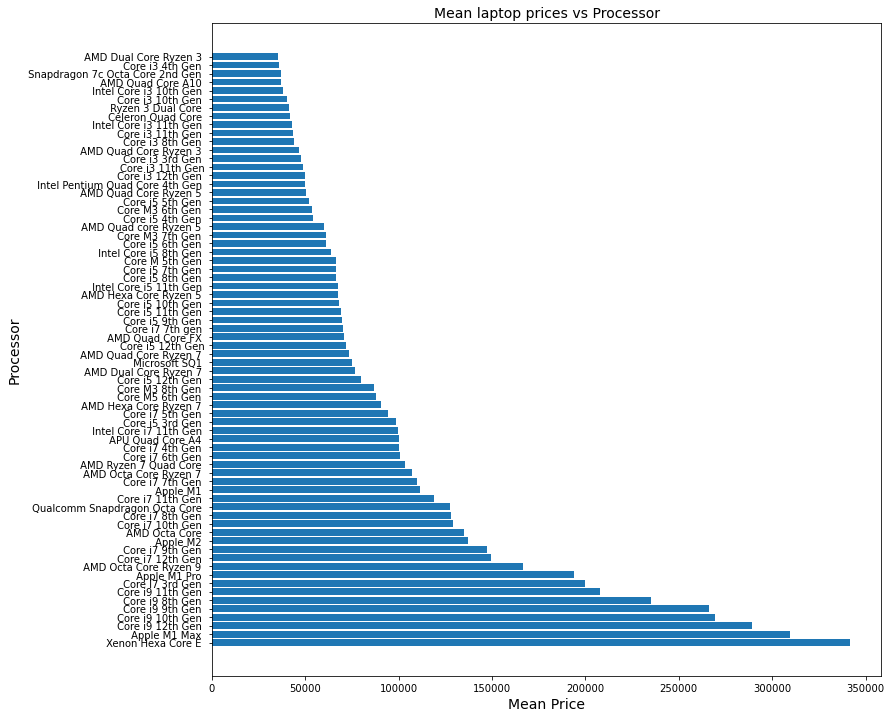

In [115]:
plt.figure(figsize=(12,12))
processor=dict(laptops.groupby('Processor').Price.mean().round().sort_values(ascending=False))
x_pcr,y_pcr=list(processor.keys()),list(processor.values())
plt.barh(x_pcr[:70],y_pcr[:70])
plt.title('Mean laptop prices vs Processor',fontsize=14)
plt.xlabel('Mean Price',fontsize=14)
plt.ylabel('Processor',fontsize=14)
plt.show()

##### The above plot is plotted for the top 70 processors of various models. It indicates that Intel being with largest market cap has wide ranging processors from highest 340k Xenon Hexa core E processor to the budget one intel core i3 at 40k.
##### The second is followed by Apple at around 310k. From the plot it is coherent that AMD and Intel are at intense competition in terms of prices as they have variants spread across the entire price range.

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


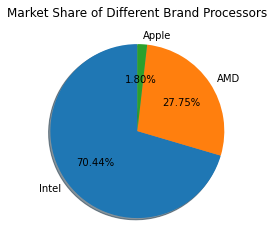

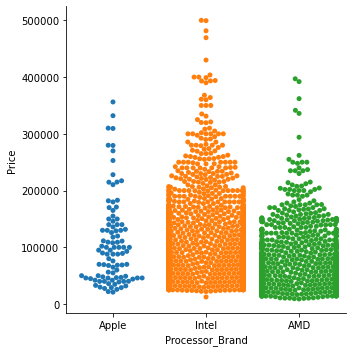

In [26]:
PB=dict(laptops.Processor_Brand.value_counts())
x_pbrand=list(PB.keys())
y_pbrand=list(PB.values())
plt.pie(y_pbrand,labels=x_pbrand,autopct='%1.2f%%',shadow=True,startangle=90)
plt.title('Market Share of Different Brand Processors')
sns.catplot(data=laptops,x='Processor_Brand',y='Price',kind='swarm')

##### From the above two plots, we can see that Intel has the major market share in terms of variants and also has wide range of collection from pocket friendly laptops to premium versions of laptops followed by AMD which also captured a sizable chunk and competing with it's predecessor in terms of pricing and variants.

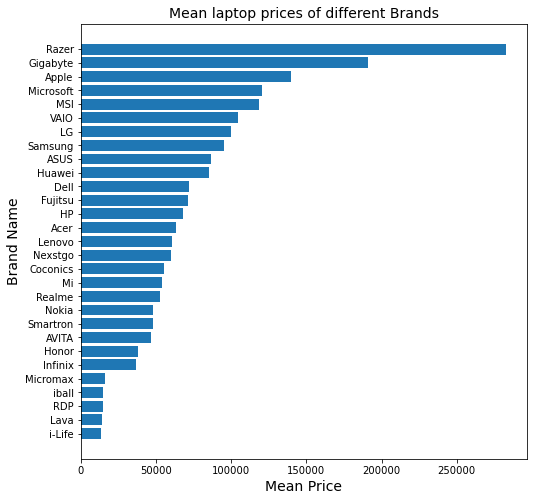

In [118]:
bar1=dict(laptops.groupby('Brand').Price.mean().round(2).sort_values())
x_brand,y_brand=list(bar1.keys()),bar1.values()
plt.figure(figsize=(8,8))
plt.barh(x_brand,y_brand)
plt.title('Mean laptop prices of different Brands',fontsize=14)
plt.xlabel('Mean Price',fontsize=14)
plt.ylabel('Brand Name',fontsize=14)
plt.show()

##### From the above plot we can infer that, ASUS despite being the brand with highest variations of laptops, is able to match the prices comparable to the competitor brands like HP, Lenovo and DELL. 
##### Razer being the smallest contributor, is selling exclusive gaming laptops at premium prices followed by Gigabyte which is also doing the same in gaming segment.
##### The third is Apple which is known for it's premimum laptops

<Figure size 1080x864 with 0 Axes>

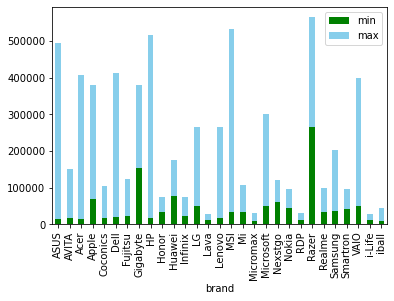

In [19]:
plt.figure(figsize=(15,12))
a=dict(laptops.groupby('Brand').Price.max())
b=dict(laptops.groupby('Brand').Price.min())
strp=pd.DataFrame({'brand':a.keys(),'min':b.values(),'max':a.values()})
strp=strp.set_index('brand')
strp.plot(kind='bar',stacked=True,color=['green','skyblue'])
plt.show()

#####  The above stacked bar chart shows the maximum and minimum price distribution of  laptops of different brands. The length of the color indicates the density of the distribution.
##### For example, the brand Razer has almost equal distribution of laptops with minimum and maximum prices while HP has the least distribution of premium laptops in the similar price category. From this we can understand that the sale of premium laptops of HP is moderate compared to the other products.

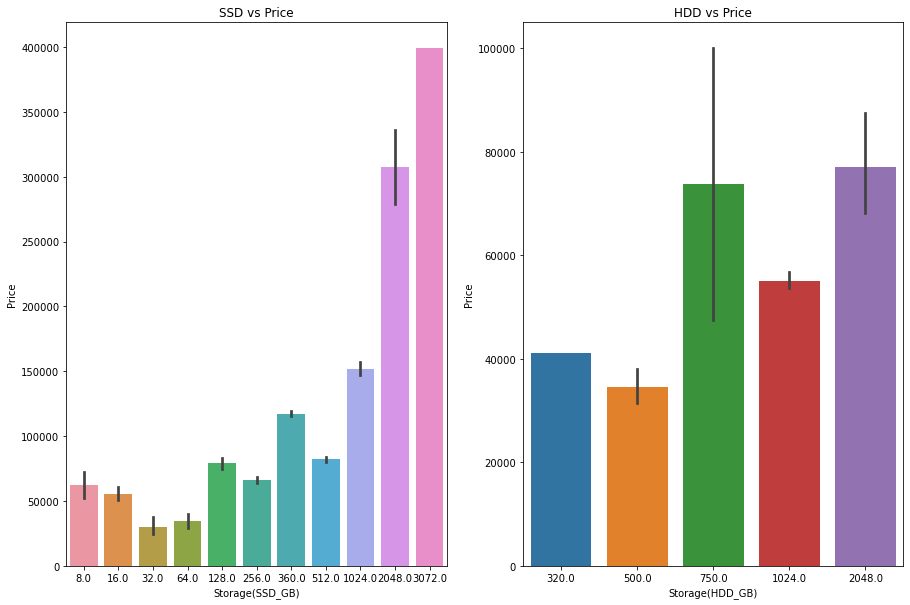

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(data=laptops,x='Storage(SSD_GB)',y='Price')
plt.title('SSD vs Price')
plt.subplot(1,2,2)
sns.barplot(data=laptops,x='Storage(HDD_GB)',y='Price')
plt.title('HDD vs Price')
plt.savefig(r'C:\Users\vivek\Downloads\EDA_PPT\HDD SSD',dpi=300,bbox_inches='tight')
plt.show()

##### From the above plot we can infer that the price of SSD is more compared to the HDD. A 3TB HDD is priced less than 80k while the similar capacity SSD is prices close to 380k which is close to 5 times of HDD.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Brand vs Price ')

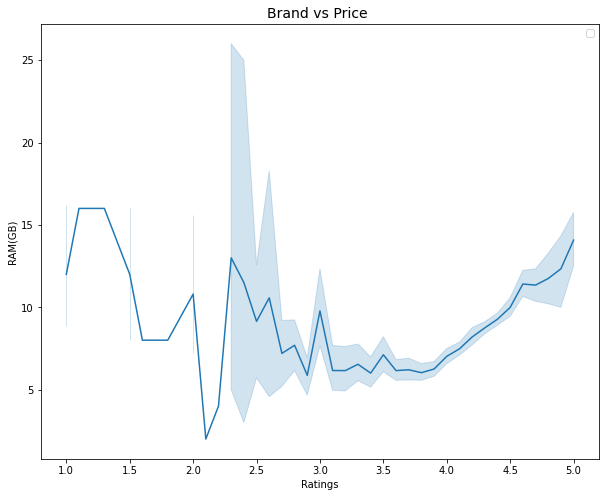

In [21]:
plt.figure(figsize=(10,8))
sns.lineplot(data=laptops,x='Ratings',y='RAM(GB)')
plt.legend(loc='upper right')
plt.title('Brand vs Price ',fontsize=14)

##### The above plot shows the variation of Ratings corresponding to the RAM. It can be inferred that there's no particular relation between RAM and performance of the laptop which affects the overall rating of the product. It might be due to various factors like version of RAM, Operating System, Storage type etc. 

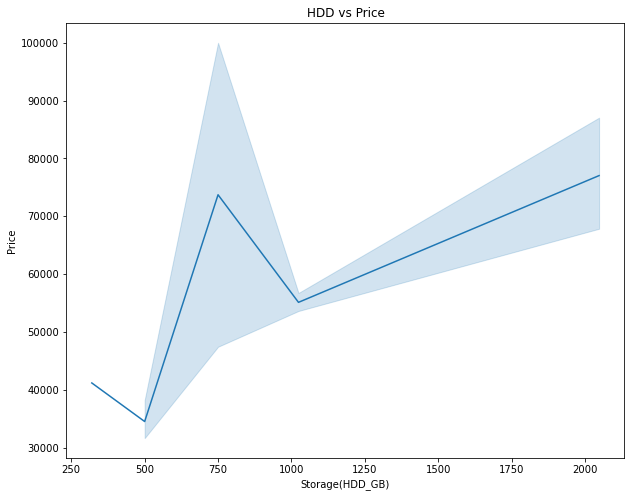

In [25]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Storage(HDD_GB)',y='Price',data=laptops)
plt.title('HDD vs Price')
plt.show()

##### From the above plot, we can see that the price of HDD is less compared to the SSD as the price range of laptops with HDD is less than 80k

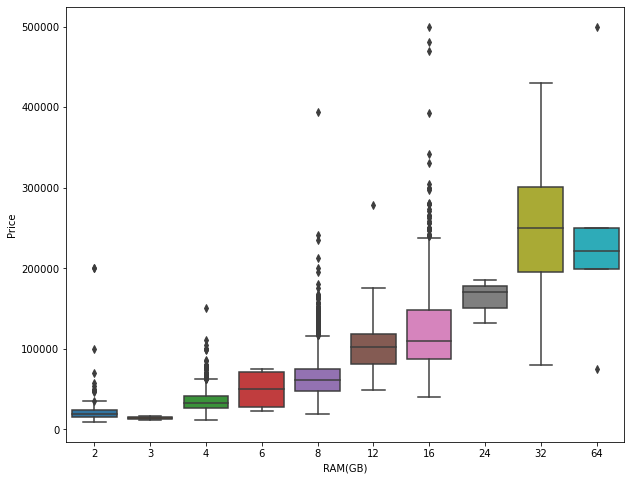

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(x='RAM(GB)',y='Price',data=laptops)
plt.show()

##### The Above plot helps us in visualizing the data distributions of the each attribute through their quartiles. As we can interpret from the outliers that as the RAM increases, the price is varying exponentially as identified in the correlation heat map.
##### The black line across the middle of each box gives the median of the each variant. For example, the median price of a 12GB RAM type is at around 120k which can be visualized directly from the plot.

## Multi-Variate Analysis

pairplot


C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


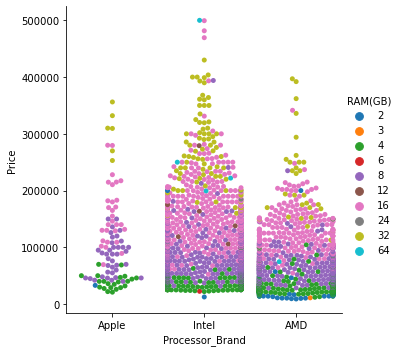

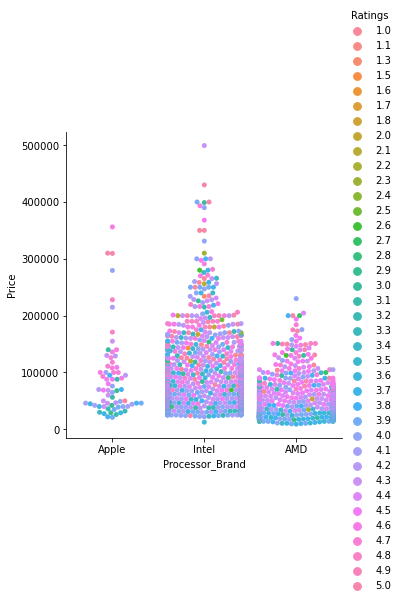

In [157]:
sns.catplot(data=laptops,x='Processor_Brand',y='Price',hue='RAM(GB)',kind='swarm')
sns.catplot(data=laptops,x='Processor_Brand',y='Price',hue='Ratings',kind='swarm')
plt.show()

#####  As the RAM corresponds the performance of the laptops, The above plots gives us the insights on the RAM and ratings of the laptop in that price segment. 
##### For example, if we consider the 1,50,000 to 2,00,000 price segement, we can extrapolate that the majority of laptops from all the three brand segments are of 16GB variants and their ratings range from 3.8-4.6 which can be considered as good range for buyers 

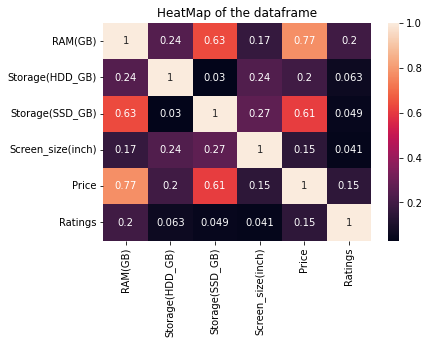

In [54]:
sns.heatmap(laptops.corr(),annot=True)
plt.title('HeatMap of the dataframe')
plt.show()

#####  The above plot shows the correlation of each attribute and their distribution with respect to the color. The dark color of the legend indicates the minimal distribution and warm colored cells indicates high distribution.
#### As we can see in the above plot the correlation between RAM and Price is more. It indicates that as RAM increases, the price also increases correspondingly. The same goes for the SSD storage.

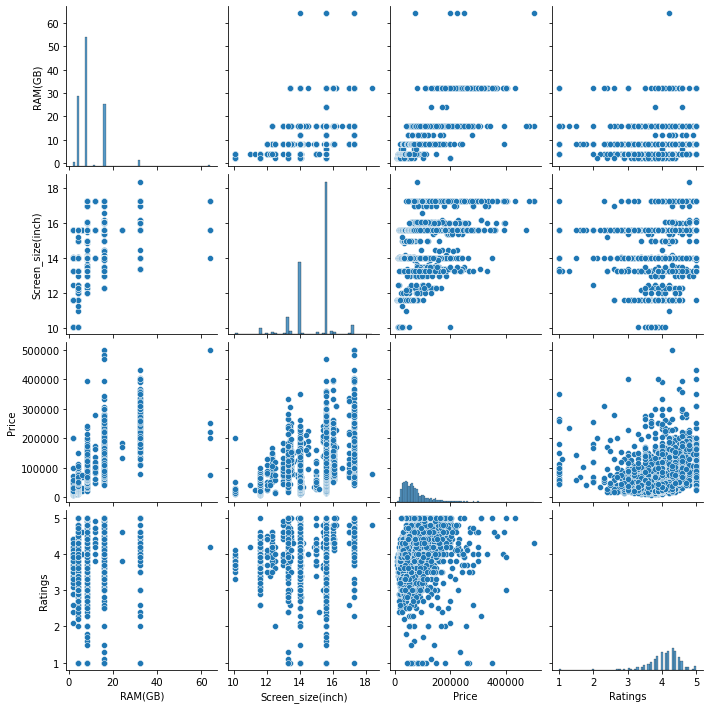

In [162]:
sns.pairplot(laptops)

##### The above plot shows the relational distribution between various numerical elements of the dataframe. We can apprehend the relational distribution between each column of the dataframe by analysing this plot. 
##### From the above plot we can infer that, the distribution is more towards the origin from the price range of 180000. We can infer the budget customers are comfortable buying from this.

In [184]:
Price_comp=laptops.copy()
Price_comp.drop(laptops[(laptops['FLipkart_price']=='NA/OOS')].index,inplace=True)
Price_comp.drop(Price_comp[(Price_comp['Amazon_price']=='NA/OOS')].index,inplace=True)
Price_comp.drop(Price_comp[(Price_comp['Croma_price']=='NA/OOS')].index,inplace=True)
Price_comp=Price_comp.astype({'FLipkart_price':'int','Amazon_price':'int','Croma_price':'int'})
a=dict(Price_comp.groupby('Brand').FLipkart_price.mean().round(2).sort_values())
b=dict(Price_comp.groupby('Brand').Amazon_price.mean().round(2).sort_values())
c=dict(Price_comp.groupby('Brand').Croma_price.mean().round(2).sort_values())
price_comp=pd.DataFrame({'Brand':a.keys(),'Flipkart_price':a.values(),'Amazon_price':b.values(),'Croma_price':c.values()})
price_comp.head()

,Brand,Flipkart_price,Amazon_price,Croma_price
0,HP,62767.83,60988.50,58849.67
1,Dell,85732.00,67656.67,69826.33
2,ASUS,211990.00,220490.00,211990.00


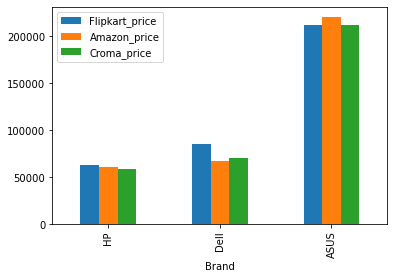

In [186]:
price_comp.plot(x='Brand',y=['Flipkart_price', 'Amazon_price', 'Croma_price'],kind='bar')
plt.show()

##### From the above chart we can visualize the price variation of the various brands across flipkart,Amazon and Croma websites. It can be seen that the price variation between Flipkart and Amazon are, though not negligible but not cumbersome. 

<Figure size 576x432 with 0 Axes>

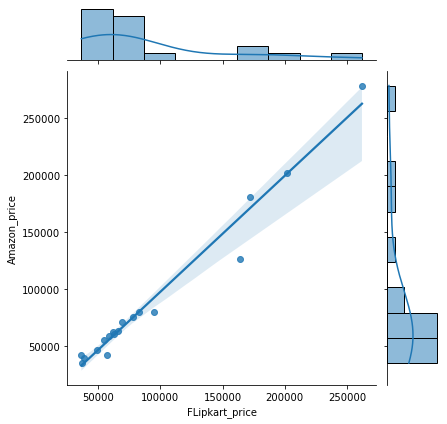

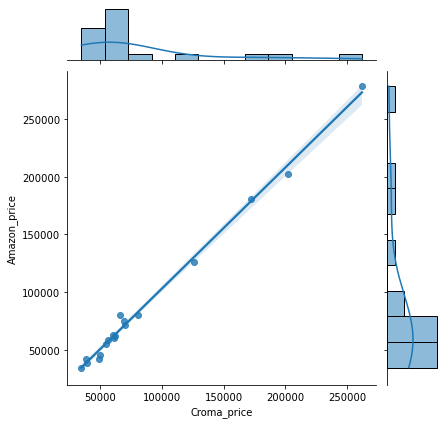

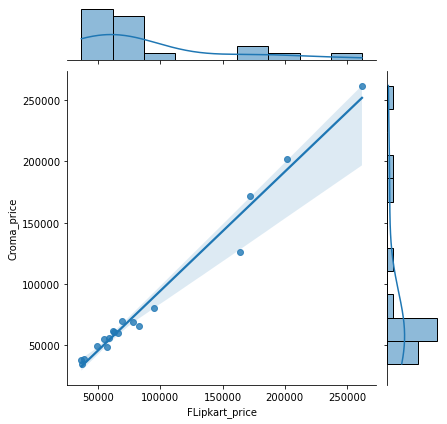

In [187]:
plt.figure(figsize=(8,6))
sns.jointplot(x='FLipkart_price',y='Amazon_price',data=Price_comp,kind='reg')
sns.jointplot(x='Croma_price',y='Amazon_price',data=Price_comp,kind='reg')
sns.jointplot(x='FLipkart_price',y='Croma_price',data=Price_comp,kind='reg')

##### The above plot is to visualize the price distribution across the Flipkart,Amazon and Croma. The scattered points are the price values and the median trace path known as regression line intersects these points . The marginal plot gives us the univariate density curve of the distribution on the margins.

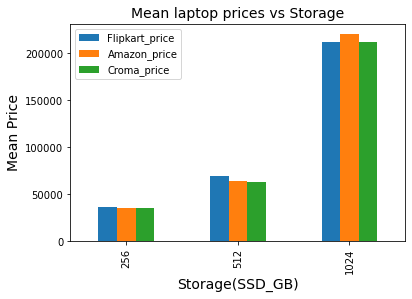

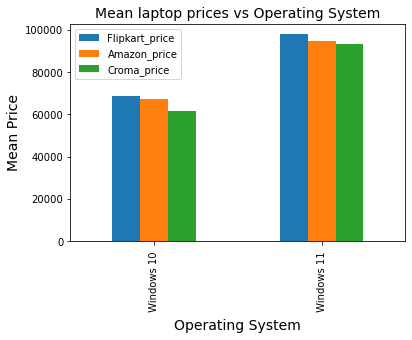

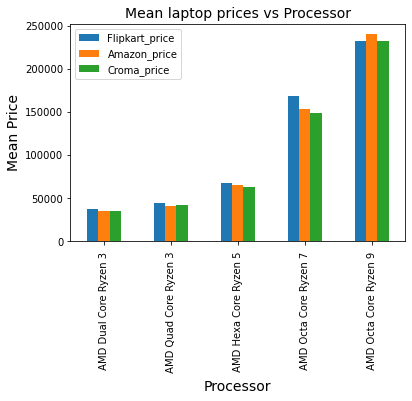

<Figure size 1224x576 with 0 Axes>

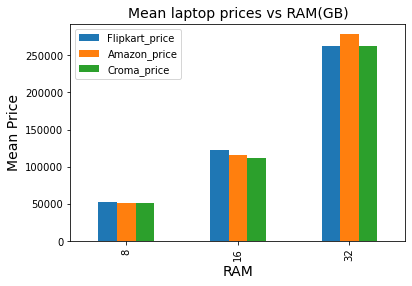

In [188]:
bar1=dict(Price_comp.groupby('Storage(SSD_GB)').FLipkart_price.mean().round(2).sort_values())
bar2=dict(Price_comp.groupby('Storage(SSD_GB)').Amazon_price.mean().round(2).sort_values())
bar3=dict(Price_comp.groupby('Storage(SSD_GB)').Croma_price.mean().round(2).sort_values())
x_brand,y1_brand=list(bar1.keys()),list(bar1.values())
y2_brand,y3_brand=list(bar2.values()),list(bar3.values())
temp=pd.DataFrame({'Brand':x_brand,'Flipkart_price':y1_brand,'Amazon_price':y2_brand,'Croma_price':y3_brand})
temp.plot(x='Brand',y=['Flipkart_price', 'Amazon_price', 'Croma_price'],kind='bar')
plt.title('Mean laptop prices vs Storage',fontsize=14)
plt.xlabel('Storage(SSD_GB)',fontsize=14)
plt.ylabel('Mean Price',fontsize=14)

bar1=dict(Price_comp.groupby('OS').FLipkart_price.mean().round(2).sort_values())
bar2=dict(Price_comp.groupby('OS').Amazon_price.mean().round(2).sort_values())
bar3=dict(Price_comp.groupby('OS').Croma_price.mean().round(2).sort_values())
x_brand,y1_brand=list(bar1.keys()),list(bar1.values())
y2_brand,y3_brand=list(bar2.values()),list(bar3.values())
temp=pd.DataFrame({'Brand':x_brand,'Flipkart_price':y1_brand,'Amazon_price':y2_brand,'Croma_price':y3_brand})
temp.plot(x='Brand',y=['Flipkart_price', 'Amazon_price', 'Croma_price'],kind='bar')
plt.title('Mean laptop prices vs Operating System',fontsize=14)
plt.xlabel('Operating System',fontsize=14)
plt.ylabel('Mean Price',fontsize=14)


bar1=dict(Price_comp.groupby('Processor').FLipkart_price.mean().round(2).sort_values())
bar2=dict(Price_comp.groupby('Processor').Amazon_price.mean().round(2).sort_values())
bar3=dict(Price_comp.groupby('Processor').Croma_price.mean().round(2).sort_values())
x_brand,y1_brand=list(bar1.keys()),list(bar1.values())
y2_brand,y3_brand=list(bar2.values()),list(bar3.values())
temp=pd.DataFrame({'Brand':x_brand,'Flipkart_price':y1_brand,'Amazon_price':y2_brand,'Croma_price':y3_brand})
temp.plot(x='Brand',y=['Flipkart_price', 'Amazon_price', 'Croma_price'],kind='bar')
plt.title('Mean laptop prices vs Processor',fontsize=14)
plt.xlabel('Processor',fontsize=14)
plt.ylabel('Mean Price',fontsize=14)

bar1=dict(Price_comp.groupby('RAM(GB)').FLipkart_price.mean().round(2).sort_values())
bar2=dict(Price_comp.groupby('RAM(GB)').Amazon_price.mean().round(2).sort_values())
bar3=dict(Price_comp.groupby('RAM(GB)').Croma_price.mean().round(2).sort_values())
x_brand,y1_brand=list(bar1.keys()),list(bar1.values())
y2_brand,y3_brand=list(bar2.values()),list(bar3.values())
temp=pd.DataFrame({'Brand':x_brand,'Flipkart_price':y1_brand,'Amazon_price':y2_brand,'Croma_price':y3_brand})
plt.figure(figsize=(17,8))
temp.plot(x='Brand',y=['Flipkart_price', 'Amazon_price', 'Croma_price'],kind='bar')
plt.title('Mean laptop prices vs RAM(GB)',fontsize=14)
plt.xlabel('RAM',fontsize=14)
plt.ylabel('Mean Price',fontsize=14)
plt.show()

## Conclusion:

##### From the Analysis, It is observed that ASUS has the major market in terms of variants followed by HP and Lenovo. In terms of pricing, the mean prices of the brands is of order lenovo< HP < ASUS.
##### Intel has the major market share in terms of variants and also has wide range of collection from pocket friendly laptops to premium versions of laptops followed by AMD which also captured a sizable chunk and competing with it's predecessor in terms of pricing and variants.
##### Apple can be considered as the premium brand because despite of less variants, it is maintaing an average price of 130k.
##### The major factors affecting the pricing of the laptops are SSD, RAM and Operating system. 
##### The effect of HDD on pricing is negligible as the price of laptops with HDD is less than 80k while the price of SSD is almost five times of HDD.
##### The Ratings and screen size has negligible impact on the pricing of laptops.
##### The price variation between Flipkart and Amazon are, though not negligible but not cumbersome. 
##### From the data acquired, It can be perceived that Amazon is offering competitive price for the brand DELL than the latter two and while it's offerings are a bit high for the brand ASUS.
##### Price offered by flipkart is slightly more than that of Amazon and Croma. Price offered by Croma is more competitive with Amazon and Flipkart.

##### Due to data constraints and lack of more samples, we cannot draw a particular conclusion as on which platform the prices are better. 

<img src="https://m.media-amazon.com/images/I/41-bCHxYsDL._SY355_.jpg" alt="simley" width="100" height="100">


# **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**                                              Thank You